In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from pathlib import Path

# make sure plots are displayed correctly on notebooks
%pylab inline
%matplotlib inline
HTML('<style>.container { width:95% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# FFT, Power Spectrum, Energy

Mean of f  -1.4210854715202004e-17


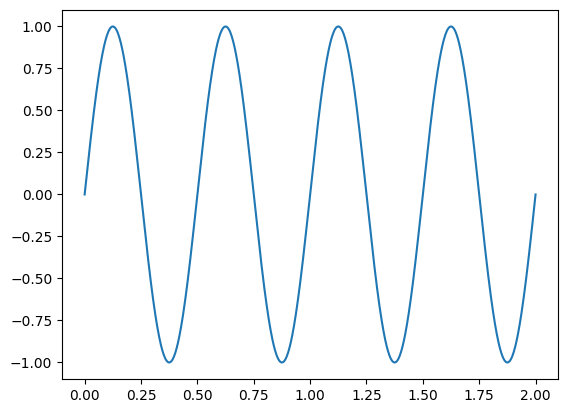

In [2]:
starttime = 0.0
endtime = 2.0
steps = 1000
t = np.linspace(starttime, endtime, num=steps)

theta = [2,4,12] # these are the frequencies
f = np.sin(2*np.pi*theta[0]*t) #+ np.sin(2*np.pi*theta[1]*t) + np.sin(2*np.pi*theta[2]*t)
dc = np.mean(f)
print('Mean of f ', dc)

plt.plot(t, f)

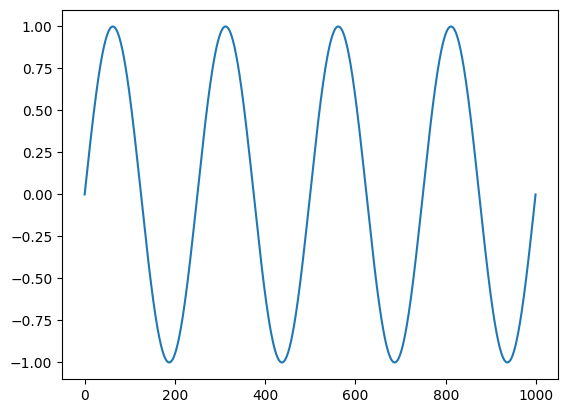

In [3]:
f = f - dc
plt.plot(np.arange(len(f)), f)

(0.0, 15.0)

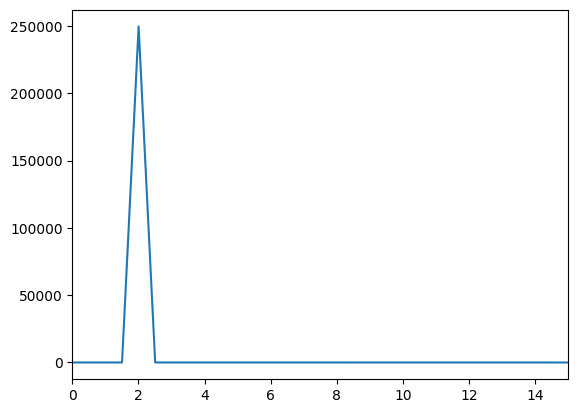

In [4]:
fhat = np.fft.fft(f)
N = len(fhat)
halvedfhat = fhat[0:int(N/2)]
powspec = abs(halvedfhat)**2

fs = steps/(endtime - starttime)

freq = np.linspace(0,int(fs/2),int(N/2))

plt.plot(freq,powspec)
plt.xlim([0,15])

In [5]:
# powspec[2*theta[i]] should give you the energy of the signal at the frequency theta[i]
for i in range(len(theta)):
    print(theta[i], powspec[2*theta[i]]) 

2 249736.73880337158
4 0.4459767961933231
12 0.02950275086152221


In [6]:
np.sum(powspec) # this is probably what Dambre calls total energy E_tot

249749.9999208767

In [7]:
de_fi = powspec[2*theta[i]]/np.sum(powspec)

In [8]:
de_fi

1.18129132616092e-07

## Test with Linear Reservoir

In [9]:
import sys  
sys.path.insert(1, './../../../../ESN-IP/SOURCES/.')

In [10]:
import torch
from ESN import Reservoir

identity_activation = torch.nn.Identity()

linear_reservoir = Reservoir(1, 1, bias=True, activation=identity_activation)

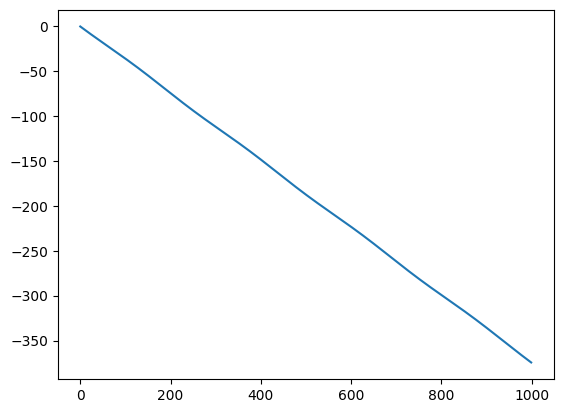

In [11]:
f_res = linear_reservoir.predict(f).flatten().numpy()
plt.plot(np.arange(len(f_res)), f_res)

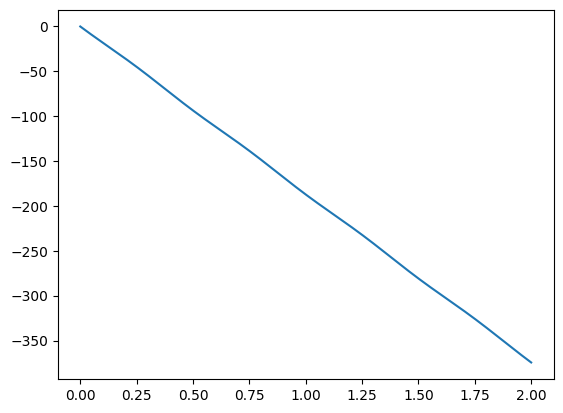

In [12]:
plt.plot(t, f_res)

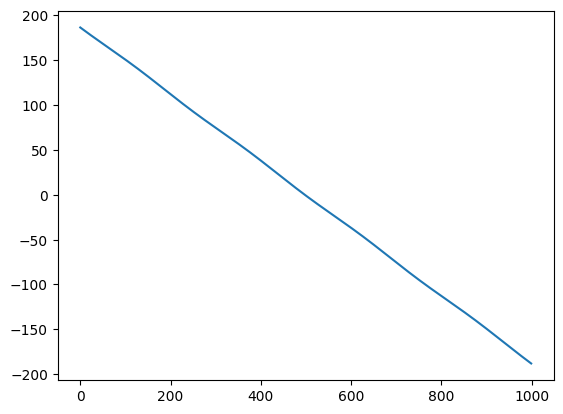

In [13]:
f = f_res - np.mean(f_res)
plt.plot(np.arange(len(f)), f)

(0.0, 15.0)

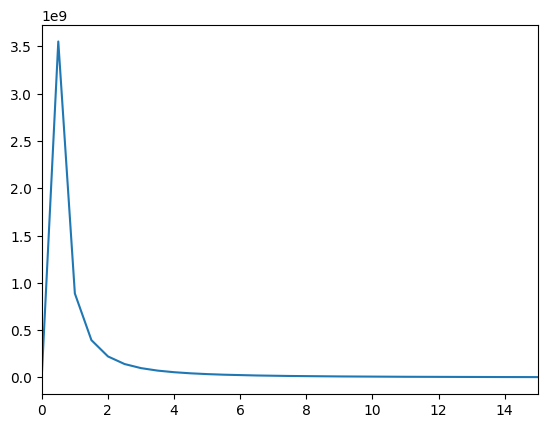

In [14]:
fhat = np.fft.fft(f)
N = len(fhat)
halvedfhat = fhat[0:int(N/2)]
powspec = abs(halvedfhat)**2

fs = steps/(endtime - starttime)

freq = np.linspace(0,int(fs/2),int(N/2))

plt.plot(freq,powspec)
plt.xlim([0,15])

In [15]:
# powspec[2*theta[i]] should give you the energy of the signal at the frequency theta[i]for i in range(len(theta)):
print(theta[0], powspec[2*theta[0]]) 

2 222325348.44091222


In [16]:
de_fi = 1 - powspec[2*theta[0]]/np.sum(powspec)

In [17]:
de_fi

0.9619407122339824

## Test with Nonlinear Reservoir

In [18]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [19]:
import torch
from ESN import Reservoir

identity_activation = torch.nn.Identity()

reservoir = Reservoir(1, 1, bias=True)

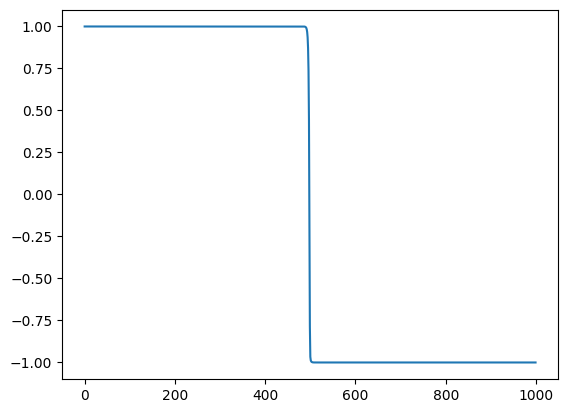

In [20]:
f_res = reservoir.predict(f).flatten().numpy()
plt.plot(np.arange(len(f_res)), f_res)

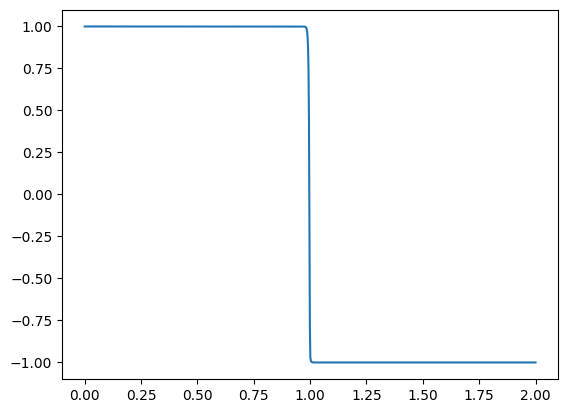

In [21]:
plt.plot(t, f_res)

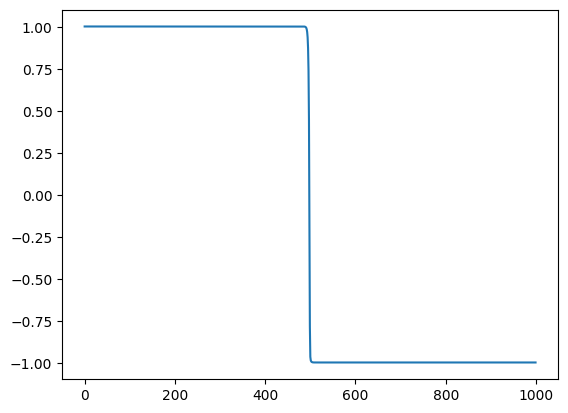

In [22]:
f = f_res - np.mean(f_res)
plt.plot(np.arange(len(f)), f)

(0.0, 15.0)

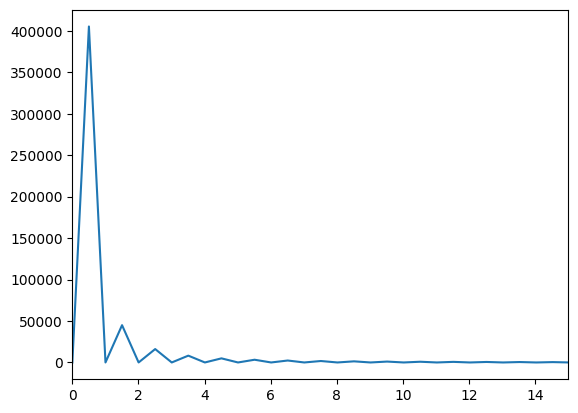

In [23]:
fhat = np.fft.fft(f)
N = len(fhat)
halvedfhat = fhat[0:int(N/2)]
powspec = abs(halvedfhat)**2

fs = steps/(endtime - starttime)

freq = np.linspace(0,int(fs/2),int(N/2))

plt.plot(freq,powspec)
plt.xlim([0,15])

In [24]:
# powspec[2*theta[i]] should give you the energy of the signal at the frequency theta[i]for i in range(len(theta)):
print(theta[0], powspec[2*theta[0]]) 

2 15.5579060874308


In [25]:
de_fi = 1 - powspec[2*theta[0]]/np.sum(powspec)

In [26]:
de_fi

0.9999687827107335

## Generalize to more than one unit

In [27]:
def deviation_from_linearity(signal, theta, verbose = True):
    starttime = 0.0
    endtime = 2.0
    steps = 1000
    fhat = np.fft.fft(signal)
    N = len(fhat)
    halvedfhat = fhat[0:int(N/2)]
    powspec = abs(halvedfhat)**2

    fs = steps/(endtime - starttime)

    freq = np.linspace(0,int(fs/2),int(N/2))
    de_phi =  (1 - powspec[2*theta]/np.sum(powspec))

    if verbose: 
        print(f"Frequence:{theta}, Deviation: {de_phi}, Powerspect: {powspec[2*theta]}, Total Energy: {np.sum(powspec)}") 

        plt.plot(freq,powspec)
        plt.xlim([0, 100])

    return de_phi

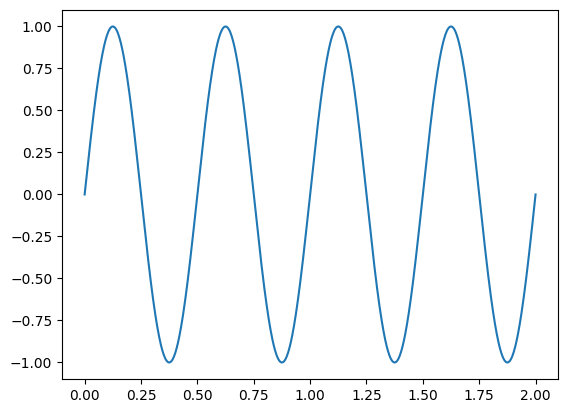

In [28]:
f = np.sin(2*np.pi*theta[0]*t) 
plt.plot(t, f)

In [29]:
reservoir = Reservoir(1, 10, bias=True, ro_rescale=0.9)
linear_reservoir = Reservoir(1, 10, bias=True,  activation=torch.nn.Identity(), ro_rescale=0.9)

In [30]:
f_res = reservoir.predict(f).numpy()
f_rlin = linear_reservoir.predict(f).numpy()

In [31]:
f_res.shape

(1000, 10)

In [32]:
# Subtract the DC component
f_res -= np.mean(f_res, axis=0)
f_rlin -= np.mean(f_rlin, axis=0)

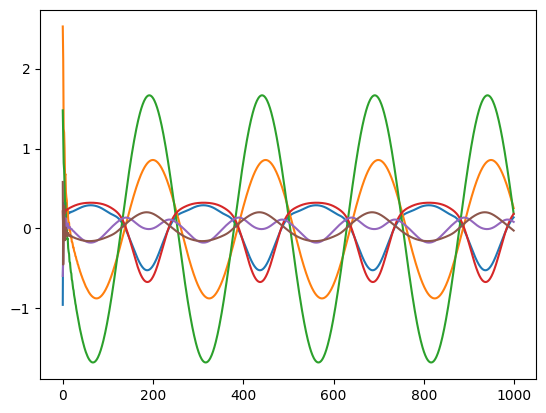

In [33]:
plt.plot(np.arange(len(f_res)), f_res[:,5])
plt.plot(np.arange(len(f_rlin)), f_rlin[:,8])
plt.plot(np.arange(len(f_rlin)), f_rlin[:,1])
plt.plot(np.arange(len(f_res)), f_res[:,3])
plt.plot(np.arange(len(f_rlin)), f_res[:,4])
plt.plot(np.arange(len(f_rlin)), f_res[:,1])

In [34]:
# Average over all neurons
f_res = np.mean(f_res, axis=1)
f_rlin = np.mean(f_rlin, axis=1)

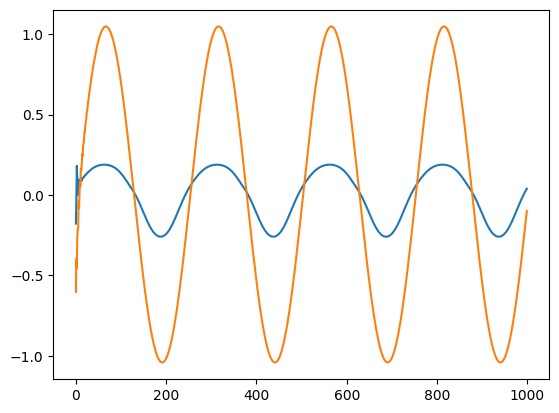

In [35]:
plt.plot(np.arange(len(f_res)), f_res)
plt.plot(np.arange(len(f_rlin)), f_rlin)

Frequence:2, Deviation: 0.030640379516269856, Powerspect: 12063.237592143649, Total Energy: 12444.543116128407
0.030640379516269856
Frequence:2, Deviation: 0.0015295256553357062, Powerspect: 272644.388150384, Total Energy: 273062.0435514944
0.0015295256553357062


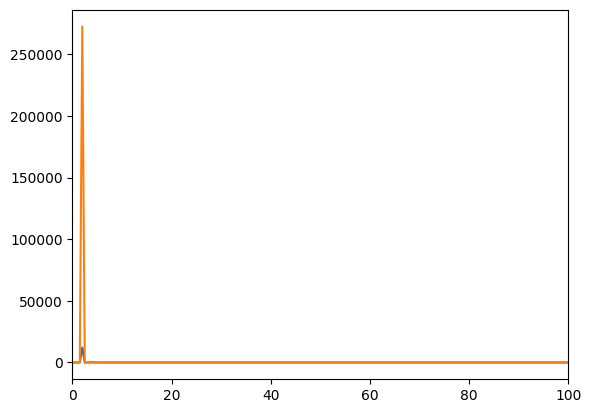

In [36]:
print(deviation_from_linearity(f_res, 2))
print(deviation_from_linearity(f_rlin, 2))

### Last step - Iterate over a range of initial carrier frequency

The range and the rescaling of the carrier frequencies for the various input sinussoids determines the scale of the metric. 

On the other hand, such a scale also depends on the spectral radius of the reservoir. 

In [37]:
theta_range = (np.linspace(0.01, 0.5, 100)*200).astype(int)

In [38]:
theta_range

array([  2,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [39]:
result_table = torch.zeros(2,2)

Frequence:2, Deviation: 0.2958198149938017, Powerspect: 27.995478916219547, Total Energy: 39.756129911512815
Frequence:2, Deviation: 0.2930320612561097, Powerspect: 27.998236798765227, Total Energy: 39.603262417403634
Frequence:3, Deviation: 0.2902883047070921, Powerspect: 28.167798935095572, Total Energy: 39.68907250918323
Frequence:4, Deviation: 0.28675895625699854, Powerspect: 28.400982448423456, Total Energy: 39.81961315543282
Frequence:5, Deviation: 0.2824276830149913, Powerspect: 28.69300519858273, Total Energy: 39.98622092772592
Frequence:6, Deviation: 0.2773981777335256, Powerspect: 29.03952276194207, Total Energy: 40.187447453229844
Frequence:7, Deviation: 0.2717701353857631, Powerspect: 29.43604935266709, Total Energy: 40.42137075531799
Frequence:8, Deviation: 0.26563720595520757, Powerspect: 29.87804285293549, Total Energy: 40.685670754601276
Frequence:9, Deviation: 0.25908752020380255, Powerspect: 30.360866712191413, Total Energy: 40.97766948201867
Frequence:10, Deviation: 

Frequence:23, Deviation: 0.16136054428086255, Powerspect: 38.17946525258051, Total Energy: 45.5254817695662
Frequence:24, Deviation: 0.15542474214395674, Powerspect: 38.56801702394568, Total Energy: 45.66557765598142
Frequence:25, Deviation: 0.1497179541495327, Powerspect: 38.909324072401404, Total Energy: 45.76049119499354
Frequence:26, Deviation: 0.14425909527726788, Powerspect: 39.202698547499, Total Energy: 45.8114112941709
Frequence:27, Deviation: 0.13906920544382095, Powerspect: 39.44859020391801, Total Energy: 45.820860925591894
Frequence:28, Deviation: 0.13417526719768935, Powerspect: 39.64831473539439, Total Energy: 45.79254118448369
Frequence:29, Deviation: 0.12960700146986903, Powerspect: 39.80387874840192, Total Energy: 45.73092708192781
Frequence:30, Deviation: 0.12539452151085761, Powerspect: 39.917670608797486, Total Energy: 45.64077357227878
Frequence:31, Deviation: 0.12156761123746318, Powerspect: 39.99222185301303, Total Energy: 45.52680703104627
Frequence:32, Deviati

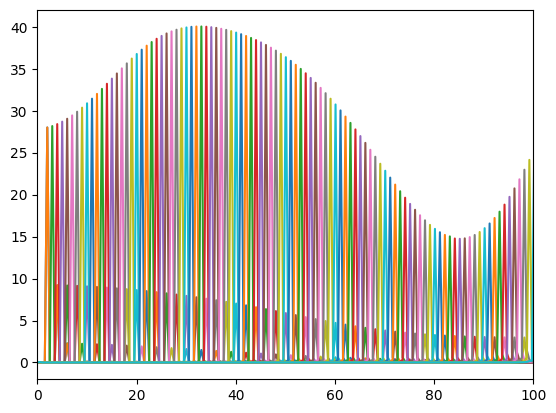

In [40]:
de_acc = 0
reservoir = Reservoir(1, 100, bias=True, ro_rescale=0.9)

for theta in theta_range:
    starttime = 0.0
    endtime = 2.0
    steps = 1000
    t = np.linspace(starttime, endtime, num=steps)
    f = np.sin(2*np.pi*theta*t) 

    f_res = reservoir.predict(f).numpy()
    f_res -= np.mean(f_res, axis=0)
    f_res = np.mean(f_res, axis=1)

    
    de_acc += deviation_from_linearity(f_res, theta, verbose=True)

de_fi = de_acc/len(theta_range)
result_table[0,0] = de_fi
print(de_fi)



Frequence:2, Deviation: 0.4873555392099874, Powerspect: 20.28050185951254, Total Energy: 39.56055982397469
Frequence:2, Deviation: 0.4837348671670346, Powerspect: 20.28443340082722, Total Energy: 39.290728950680716
Frequence:3, Deviation: 0.47568256447194035, Powerspect: 20.70218756859343, Total Energy: 39.48407236876166
Frequence:4, Deviation: 0.46539092692794404, Powerspect: 21.271574298341214, Total Energy: 39.78902598137196
Frequence:5, Deviation: 0.4531424596648965, Powerspect: 21.97569162745117, Total Energy: 40.185404802107875
Frequence:6, Deviation: 0.43939170284176843, Powerspect: 22.800520951878514, Total Energy: 40.6710372776432
Frequence:7, Deviation: 0.4245317267293055, Powerspect: 23.73313745335765, Total Energy: 41.2414351159092
Frequence:8, Deviation: 0.4088871744682615, Powerspect: 24.76190475121806, Total Energy: 41.89031887261686
Frequence:9, Deviation: 0.3927278180564233, Powerspect: 25.87611144492291, Total Energy: 42.61040142182427
Frequence:10, Deviation: 0.37628

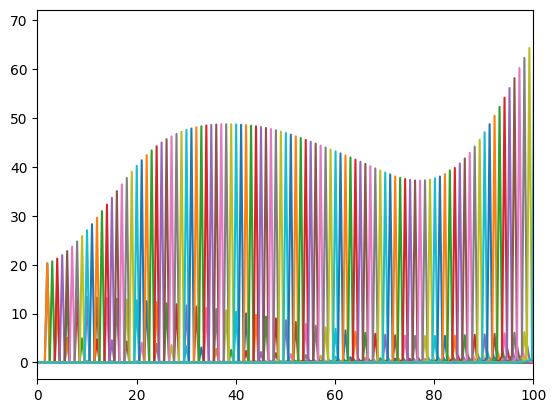

In [41]:
de_acc = []
reservoir.reset_initial_state()
reservoir.rescale_weights(0.99) #activation=torch.nn.Tanh())

for theta in theta_range:
    starttime = 0.0
    endtime = 2.0
    steps = 1000
    t = np.linspace(starttime, endtime, num=steps)
    f = np.sin(2*np.pi*theta*t) 

    f_res = reservoir.predict(f).numpy()
    f_res -= np.mean(f_res, axis=0)
    f_res = np.mean(f_res, axis=1)
    
    de_theta = deviation_from_linearity(f_res, theta, verbose=True)
    de_acc.append(de_theta)


de_fi = sum(de_acc)/len(theta_range)
result_table[1,0] = de_fi
print(de_fi)


Frequence:2, Deviation: 0.01621617521548102, Powerspect: 1041.4608162043944, Total Energy: 1058.6277086152627
Frequence:2, Deviation: 6.489618900684668e-05, Powerspect: 1041.5920231760979, Total Energy: 1041.6596229158674
Frequence:3, Deviation: 0.0005453513063518045, Powerspect: 1105.933064722089, Total Energy: 1106.5365158565373
Frequence:4, Deviation: 0.0005915794547109998, Powerspect: 1192.7357557350865, Total Energy: 1193.4417713674213
Frequence:5, Deviation: 0.0006534246633747021, Powerspect: 1295.1732534926011, Total Energy: 1296.0201049934333
Frequence:6, Deviation: 0.0007431516464981858, Powerspect: 1408.1664187785657, Total Energy: 1409.2136782438204
Frequence:7, Deviation: 0.0008677859789646414, Powerspect: 1527.15069915228, Total Energy: 1528.4770901402724
Frequence:8, Deviation: 0.0010299452764979122, Powerspect: 1648.4277941493272, Total Energy: 1650.1273350036342
Frequence:9, Deviation: 0.0012295039244250017, Powerspect: 1769.3136498180388, Total Energy: 1771.49170582243

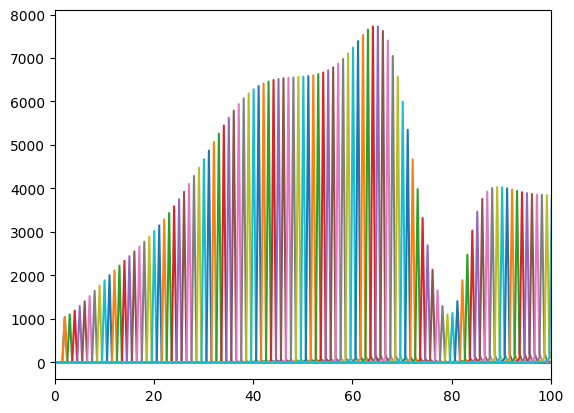

In [42]:
de_acc = [ ]
reservoir.reset_initial_state()
reservoir.activation = torch.nn.Identity()#)
reservoir.rescale_weights(0.99) 


for theta in theta_range:
    starttime = 0.0
    endtime = 2.0
    steps = 1000
    t = np.linspace(starttime, endtime, num=steps)
    f = np.sin(2*np.pi*theta*t) 

    f_res = reservoir.predict(f).numpy()
    f_res -= np.mean(f_res, axis=0)
    f_res = np.mean(f_res, axis=1)

    
    de_acc.append(deviation_from_linearity(f_res, theta, verbose=True))

de_fi = sum(de_acc)/len(theta_range)
result_table[1, 1] = de_fi
print(de_fi)


In [43]:
from Metrics import DeltaPhi

Frequence:2, Deviation: 0.01621617521548102,  Powerspect: 1041.4608162043944, Total Energy: 1058.6277086152627
Frequence:2, Deviation: 6.489618900684668e-05,  Powerspect: 1041.5920231760979, Total Energy: 1041.6596229158674
Frequence:3, Deviation: 0.0005453513063518045,  Powerspect: 1105.933064722089, Total Energy: 1106.5365158565373
Frequence:4, Deviation: 0.0005915794547109998,  Powerspect: 1192.7357557350865, Total Energy: 1193.4417713674213
Frequence:5, Deviation: 0.0006534246633747021,  Powerspect: 1295.1732534926011, Total Energy: 1296.0201049934333
Frequence:6, Deviation: 0.0007431516464981858,  Powerspect: 1408.1664187785657, Total Energy: 1409.2136782438204
Frequence:7, Deviation: 0.0008677859789646414,  Powerspect: 1527.15069915228, Total Energy: 1528.4770901402724
Frequence:8, Deviation: 0.0010299452764979122,  Powerspect: 1648.4277941493272, Total Energy: 1650.1273350036342
Frequence:9, Deviation: 0.0012295039244250017,  Powerspect: 1769.3136498180388, Total Energy: 1771.49

0.04459885827832286

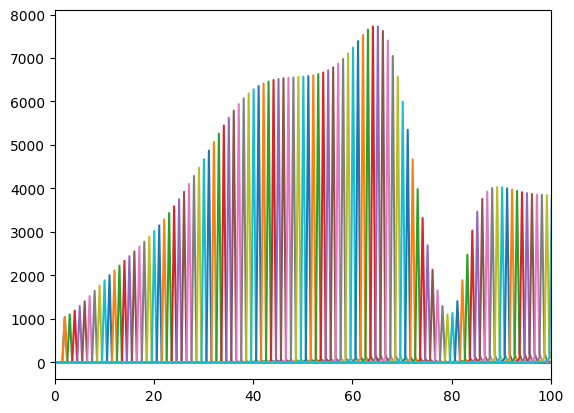

In [44]:
reservoir.reset_initial_state()
DeltaPhi(verbose=True, plot=True, theta_range=theta_range).evaluate(reservoir)

Frequence:2, Deviation: 0.12507049326394692,  Powerspect: 28.777154339381717, Total Energy: 32.89082619551331
Frequence:2, Deviation: 0.00027999784202692446,  Powerspect: 28.708452481821652, Total Energy: 28.716493037902847
Frequence:3, Deviation: 0.0013736579469113552,  Powerspect: 59.84755272249939, Total Energy: 59.9298758727494
Frequence:4, Deviation: 0.0010953472367727368,  Powerspect: 102.66452894195098, Total Energy: 102.7771055605302
Frequence:5, Deviation: 0.0010120940023629066,  Powerspect: 155.89457203456843, Total Energy: 156.0525118458613
Frequence:6, Deviation: 0.0010311802110872792,  Powerspect: 218.32723644197495, Total Energy: 218.55260356184954
Frequence:7, Deviation: 0.0011167763747796933,  Powerspect: 288.65800841823335, Total Energy: 288.9807352761562
Frequence:8, Deviation: 0.0012524885779580108,  Powerspect: 365.5615046352992, Total Energy: 366.01994042999263
Frequence:9, Deviation: 0.0014298570826554169,  Powerspect: 447.75515886609315, Total Energy: 448.3963014

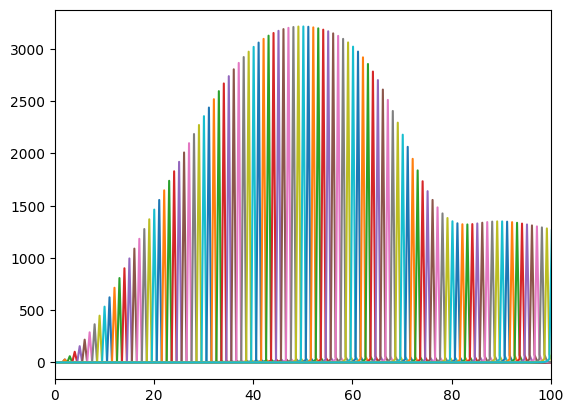

In [45]:
reservoir.reset_initial_state()
reservoir.rescale_weights(0.9)
de_fi = DeltaPhi(verbose=True, plot=True, theta_range=theta_range).evaluate(reservoir)
result_table[0,1] = de_fi
print(de_fi)

## Summing Up 

In [46]:
result_table = result_table.numpy()

## 

In [47]:
print("----------", "|", "-- Tanh --", "|", "-- Linear --" )
print("rho = 0.99", "|", result_table[1, 0], "|", result_table[1, 1] )
print("rho = 0.90",  "|",result_table[0, 0], "|", result_table[0, 1] )


---------- | -- Tanh -- | -- Linear --
rho = 0.99 | 0.20900616 | 0.04459886
rho = 0.90 | 0.17597625 | 0.044458963
